### Drills
Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

1. Choose one variable and plot that variable four different ways.
2. Choose two continuous variables, and plot them three different ways.
3. Choose one continuous variable and one categorical variable, and plot them six different ways.

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# We import the data from csv file:
df = pd.read_csv('think capstone1_slim.csv' ,encoding ='latin1')

In [10]:
df.head()

,YYYY_MM,IdProduct,Product_Name,Manufacturer_Name,Product Classification,IdLocation,Drugstore_Name,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit,row_num_sales,row_num_profit
0,2015-1,20177,Nut Seringa Ject 10 Ml Cu Ac,MINUT,_DispozitivMedicalMultiplu,3,Stad,45.73,15,0,86.0,18.07,2,3
1,2015-1,2130,Panthen Unguent 50 Mg /G X 100 G,BAYER SCHERING,Cosmetice,3,Stad,265.55,4,0,5.0,46.66,1,1
2,2015-1,18,Oderma Abc Derm Gel Spumant X 200 Ml,BIODERMA,Cosmetice,3,Stad,37.42,1,0,1.0,9.45,14,9
3,2015-1,20697,Ltene Tratament Pt Unghii,FOLTENE,Cosmetice,3,Stad,48.90,1,0,1.0,4.38,8,33
4,2015-1,25030,Nsiprod Tensiometru Pentru Brat,PANSIPROD,Dispozitive Medicale,3,Stad,408.16,2,0,2.0,96.13,1,2


# 1.Choose one variable and plot that variable four different ways.

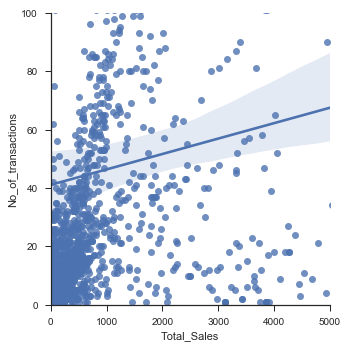

In [73]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
# df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
lm=sns.lmplot(
            x="Total_Sales", y="No_of_transactions"
           , data=df

             )

lm.set(xlim=(0, 5000))
lm.set(ylim=(0, 100))

plt.show()

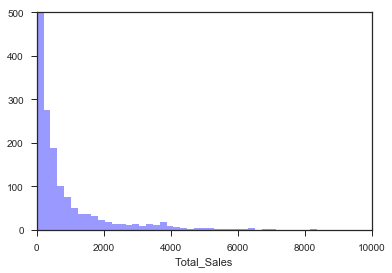

In [93]:
h = sns.distplot(df['Total_Sales'], kde=False, color="b" , bins=100)

h.set(xlim=(0, 10000))
h.set(ylim=(0, 500))

plt.show()

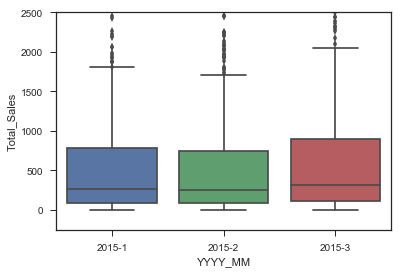

In [81]:
sns.boxplot( x ='YYYY_MM', y ='Total_Sales',data=df )  
axes = plt.gca()
axes.set_ylim(-250,2500)
plt.show()

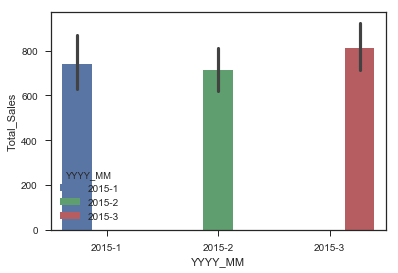

In [84]:
sns.barplot( x ='YYYY_MM', y ='Total_Sales',data=df , hue = 'YYYY_MM' )

# 2. Choose two continuous variables, and plot them three different ways.

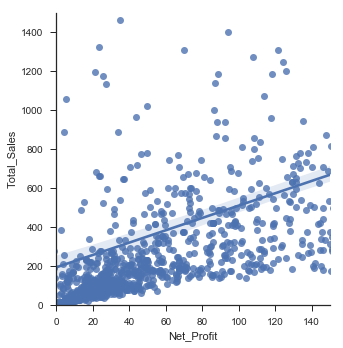

In [95]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
# df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
lm=sns.lmplot(
            x="Net_Profit", y="Total_Sales"
           , data=df 
             )

lm.set(xlim=(0, 150))
lm.set(ylim=(0, 1500))

plt.show()

ValueError: Using arbitrary long args with data is not supported due to ambiguity of arguments.
Use multiple plotting calls instead.

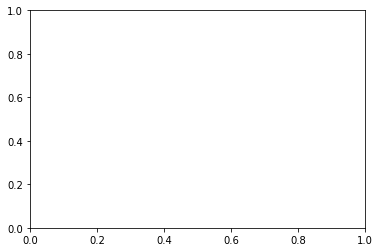

In [27]:
#plt.plot( x ='Net_Profit', y ='Total_Sales',data=df , linestyle='-', marker='o' )

# Overview of the columns that have summable values:
g = df.groupby('Product Classification')['Total_Sales','Net_Profit'].mean().reset_index().sort_values('Net_Profit',ascending=False)
#g['Total_Sales']
plt.plot( x ='Net_Profit', y ='Total_Sales',data=g.head(5) , linestyle='-', marker='o' )

                            Net_Profit  Total_Sales
Product Classification                             
RX                          612.492559  3200.610569
PROPRII                     332.706709   635.951709
OTC                         270.395805  1002.922732
Suplimente                  163.490145   587.553768
Dispozitive Medicale         57.753474   297.771526
Parafarm.                    49.786800   376.078900
0 Consumabile                23.707759   146.538448
Cosmetice                    15.666471   112.299412
_DispozitivMedicalMultiplu   14.648418    32.780696
Homeopate                     6.385823    18.716203
RX - 120                      5.630667    30.604000
0 Obiecte de inventar        -2.750000     0.300000


Text(0,0.5,'Total_Sales')

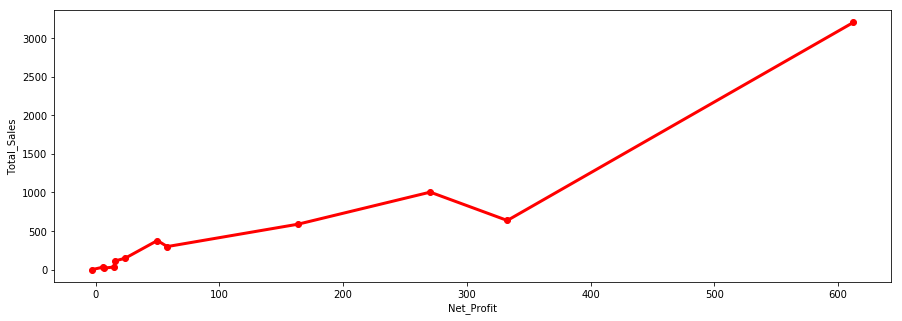

In [48]:
e=df.groupby(['Product Classification'])['Net_Profit','Total_Sales'].mean() #No_of_transactions

e=e.sort_values(by='Net_Profit',ascending=False)
print(e)


plt.figure(figsize=(15, 5))
plt.plot('Net_Profit','Total_Sales' , data = e.head(100), color='red'  ,linewidth=3, marker='o' )
plt.xlabel('Net_Profit')
plt.ylabel('Total_Sales')

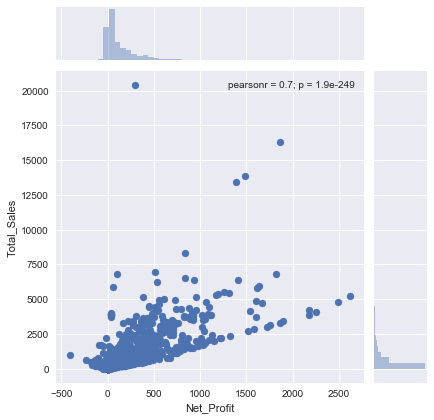

In [136]:

sns.jointplot ( x = 'Net_Profit', y ='Total_Sales'  , data = df)
plt.show()

# 3. Choose one continuous variable and one categorical variable, and plot them six different ways.


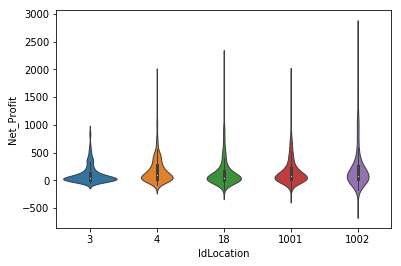

In [7]:
sns.violinplot( x=df['IdLocation'] , y=df['Net_Profit'] , linewidth=1 )

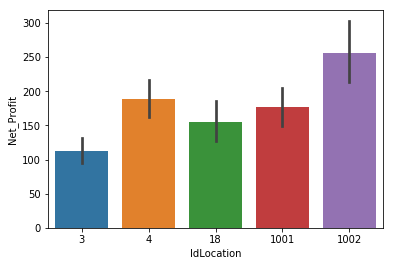

In [9]:
sns.barplot(x=df['IdLocation'] , y=df['Net_Profit'])

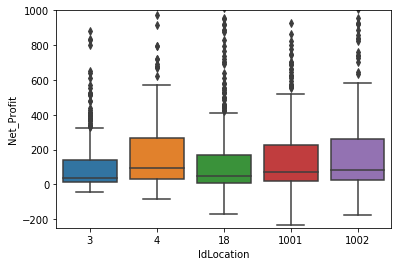

In [12]:
sns.boxplot( x ='IdLocation', y ='Net_Profit',data=df )  
axes = plt.gca()
axes.set_ylim(-250,1000)
plt.show()

  IdLocation  Net_Profit
0       1001    63431.54
1       1002    84350.38
2         18    55693.37
3          3    35656.40
4          4    60347.67


Text(0,0.5,'Net_Profit')

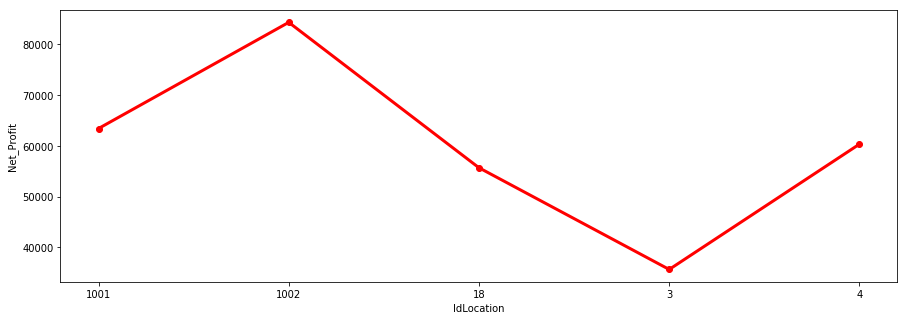

In [49]:
e=df.groupby(df['IdLocation'].astype(str))['Net_Profit'].sum().reset_index()#.sort_values('Net_Profit',ascending=False)

print(e)


plt.figure(figsize=(15, 5))
plt.plot('IdLocation' ,'Net_Profit' , data = e.head(100), color='red'  ,linewidth=3, marker='o' )
plt.xlabel('IdLocation')
plt.ylabel('Net_Profit')

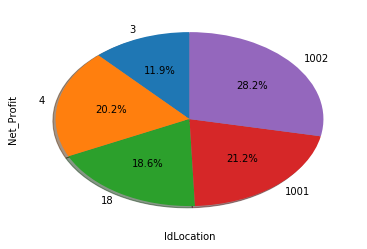

In [57]:
plt.pie( df.groupby(['IdLocation'])['Net_Profit'].sum()
       ,labels=np.unique(df.IdLocation)
        ,  autopct='%1.1f%%',  shadow=True, startangle=90
       )
plt.xlabel('IdLocation')
plt.ylabel('Net_Profit')
plt.show()

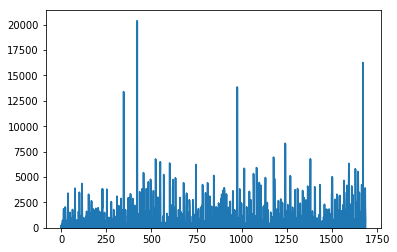

In [60]:
df['Total_Sales'].plot.area()